In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv("/content/reklama_sales.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Yuqoridagi jadvalda MohirDev MChJ tomonidan turli OAV larda (TV, Radio, Newspaper) berilgan reklamalar soni va mos keluvchi savdolar (Sales) berilgan.

Sizning vazifangiz:

*  Aynan qaysi turdagi OAVda reklama berish savdo o'sishiga ta'sir qiladi aniqlash
*  Topilgan bog'liqlik asosida Simple Linear Regression algorithmi yordamida bashorat modelini qurish.
*  Ushbu amaliyotda sizning vazifangiz berilgan dataset yordamida Simple Linear Regression model yaratish:

*   CRISP-DM metodologiyasiga amal qiling!
*   Simple linear regression qo'llash uchun 1 ta ustunni tanlab oling.

In [7]:
# ma'lumotlarni o'rganamiz
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
df.corrwith(df["Sales"]).sort_values(ascending=False)  # ajoyib correlatsiya TV bilan ekan,1-shartga javob topdik!!!

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
dtype: float64

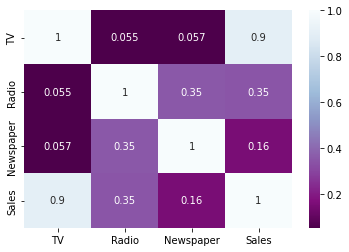

In [11]:
sns.heatmap(data=df.corr(),annot=True,cmap="BuPu_r")
plt.show()

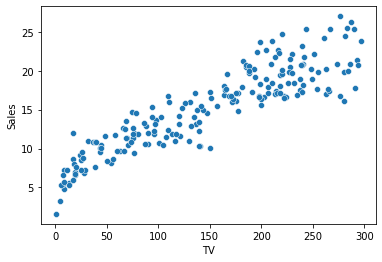

In [12]:

sns.scatterplot(data=df,x='TV',y="Sales")
plt.show()

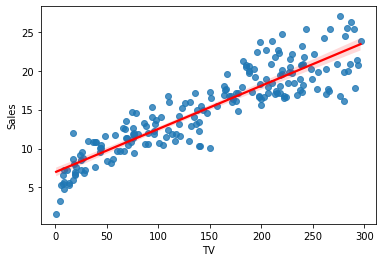

In [13]:
sns.regplot(data=df,x="TV",y="Sales",line_kws={"color":"red"})
plt.show()    #biz aynan algoritm yordamida mana shu qizil chiziq formula koeffitsiyentlarini keltirishimiz kerak

**Algoritmni quramiz......**

y = theta0 + theta1*x   - qiymatlar shu formula orqali aniqlanadi


```
1) theta0 va theta1 koeffitsient
2) x qiymat
```



In [21]:
X = df["TV"].to_numpy()
Y = df["Sales"].to_numpy()


In [25]:
df[["TV"]].to_numpy().shape

(200, 1)

In [29]:
Xmean=np.mean(X)
Ymean=np.mean(Y)

In [31]:
theta1=sum((X-X_mean)*(Y-Ymean))/sum((X-Xmean)**2)
theta0=Ymean-theta1*Xmean

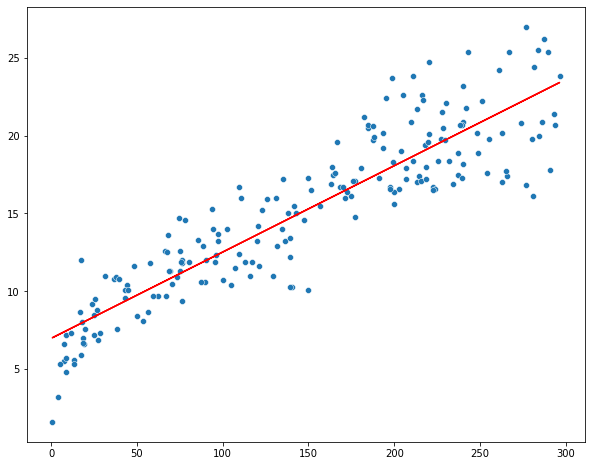

In [33]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x=X,y=Y)
plt.plot(X,theta0+theta1*X,c="r")

In [35]:
print(f"theta0 = {theta0}")
print(f"theta1 = {theta1}")

theta0 = 6.974821488229903
theta1 = 0.05546477046955879


In [37]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(df,random_state=21,train_size=0.8)

In [34]:
#theta0 va theta1 koeffitsiyentlarni boshqa usulda ham topish mumkin
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()

In [39]:
X_train=np.asanyarray(train_set[["TV"]])
Y_train=np.asanyarray(train_set[["Sales"]])

In [40]:
LR_model.fit(X_train,Y_train)

LinearRegression()

In [42]:
from matplotlib.projections.polar import ThetaTick
thetaa1=LR_model.coef_[0][0]
thetaa0=LR_model.intercept_[0]
print(f'theta1={thetaa1}')
print(f'theta0={thetaa0}')

theta1=0.05535870797306645
theta0=7.047826539573618


In [43]:
theta0

6.974821488229903

In [44]:
theta1

0.05546477046955879

**Modelni baholaymiz**


In [46]:
X_test = np.asanyarray(test_set[["TV"]])
X_test = np.asanyarray(test_set[["Sales"]])
predict_test = LR_model.predict(X_test)


In [47]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE = mean_absolute_error(predict_test,X_test)
RMSE = np.sqrt(mean_squared_error(predict_test,X_test))
print(f"MAE={MAE}")
print(f"RMSE={RMSE}")

MAE=7.565462427647569
RMSE=9.118275997240762
